<a href="https://colab.research.google.com/github/nuvita97/Temperature-Prediction/blob/main/Humidity_%26_Temp_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!git clone https://github.com/nuvita97/Temperature-Prediction

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
path = 'Temperature-Prediction'
os.chdir(path)
os.listdir()

Cloning into 'Temperature-Prediction'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


['Humidity_&_Temp_Prediction.ipynb',
 '.git',
 'Measurement Accuracy.JPG',
 'README.md',
 'Humidity_Temp_Prediction.csv']

In [19]:
data = pd.read_csv('Humidity_Temp_Prediction.csv', delimiter = ';')

print(data.shape)
print(data.head())

(619999, 4)
     id  temp  humidity            date_time
0  9197    21        20  2016-08-17 00:00:01
1  9198    21        20  2016-08-17 00:01:01
2  9199    21        20  2016-08-17 00:02:01
3  9200    21        20  2016-08-17 00:03:01
4  9201    21        20  2016-08-17 00:04:01


In [20]:
data.dtypes

id            int64
temp          int64
humidity      int64
date_time    object
dtype: object

In [21]:
# Change type to datetime
data['date_time'] = pd.to_datetime(data['date_time'])
data.dtypes

id                    int64
temp                  int64
humidity              int64
date_time    datetime64[ns]
dtype: object

In [22]:
# Use MINUTES IN A DAY to predict Humidity & Temp (60*20 = 1440 values) 
# Feature Engineering: date_time => minute

data['minute'] = data['date_time'].dt.minute + data['date_time'].dt.hour * 60

print(data['minute'].min())
print(data['minute'].max())
data

0
1439


,id,temp,humidity,date_time,minute
0,9197,21,20,2016-08-17 00:00:01,0
1,9198,21,20,2016-08-17 00:01:01,1
2,9199,21,20,2016-08-17 00:02:01,2
3,9200,21,20,2016-08-17 00:03:01,3
4,9201,21,20,2016-08-17 00:04:01,4
...,...,...,...,...,...
619994,629191,18,21,2017-12-17 03:13:01,193
619995,629192,18,21,2017-12-17 03:14:02,194
619996,629193,18,21,2017-12-17 03:15:02,195
619997,629194,19,20,2017-12-17 03:16:01,196


In [23]:
feature = 'minute'
target = 'temp'

# Group minute from 0 to 1439 & calculate Mean for each minute
minute_group = data.loc[:, [feature, target]].groupby(feature, as_index = False).mean()
minute_group

,minute,temp
0,0,19.161731
1,1,19.153318
2,2,19.169683
3,3,19.152273
4,4,19.141230
...,...,...
1435,1435,19.178490
1436,1436,19.155606
1437,1437,19.157895
1438,1438,19.132118


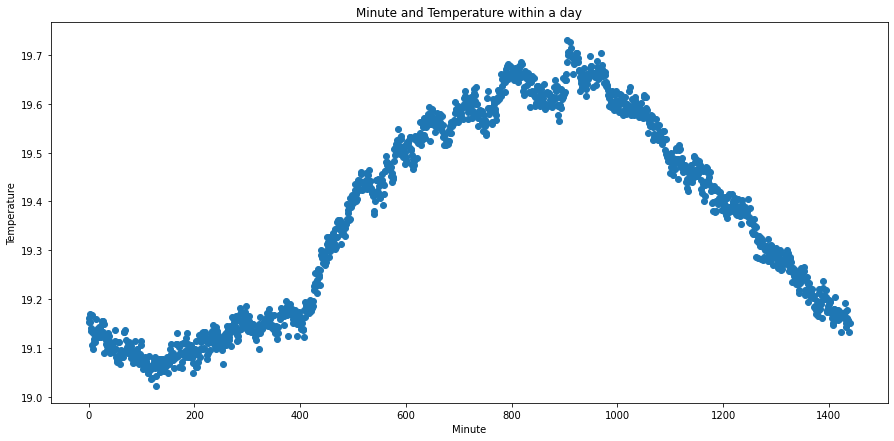

In [24]:
plt.figure(figsize = (15, 7))
plt.scatter(minute_group["minute"], minute_group["temp"])
plt.title("Minute and Temperature within a day")
plt.xlabel("Minute")
plt.ylabel("Temperature")
plt.show()

In [25]:
featurex = 'minute'
featurey = 'temp'

X = data[featurex] # Learn on X
y = data[featurey] # Predict y

print(X)
print(y)


0           0
1           1
2           2
3           3
4           4
         ... 
619994    193
619995    194
619996    195
619997    196
619998    197
Name: minute, Length: 619999, dtype: int64
0         21
1         21
2         21
3         21
4         21
          ..
619994    18
619995    18
619996    18
619997    19
619998    19
Name: temp, Length: 619999, dtype: int64


In [26]:
# x ==> X_poly = (1, x, x^2, x^3, x^4) 
# ==> (a0, a1, a2, a3, a4) independently 
# ==> sum (a0 + a1*x + a2*x + a3*x +a4*x) = temp (ex: 21)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X.values.reshape(-1, 1)) # Change X to 2D array

print(X_poly[:5])

[[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [28]:
y_predict = lin_reg.predict(poly_reg.fit_transform(minute_group["minute"].values.reshape(-1, 1)))
print(y_predict.shape)
y_predict

(1440,)


array([19.19107031, 19.18913006, 19.18720588, ..., 19.14246301,
       19.14159919, 19.14074006])

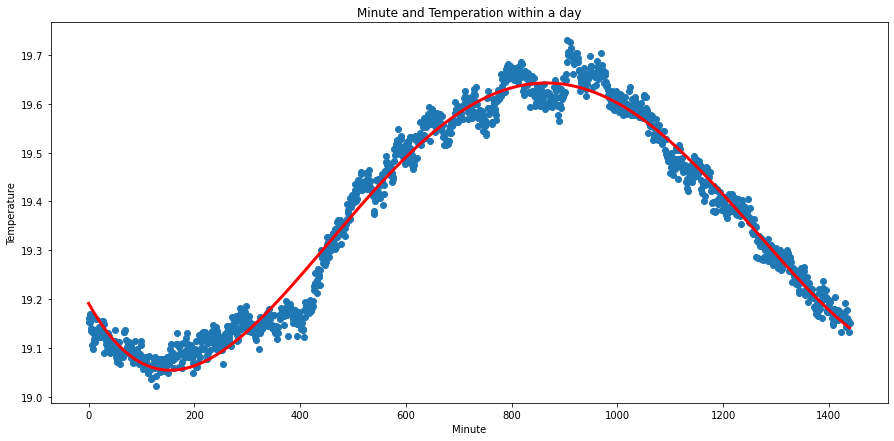

In [29]:
plt.figure(figsize=(15, 7))
plt.scatter(minute_group["minute"], minute_group["temp"])
plt.plot(minute_group["minute"], y_predict, color = "red", linewidth = 3)
plt.title("Minute and Temperation within a day")
plt.xlabel("Minute")
plt.ylabel("Temperature")
plt.show()

In [30]:
# Model Assessment
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Rsquare2 = r2_score(minute_group["temp"], y_predict)
MSE = mean_squared_error(minute_group["temp"], y_predict)
MAE = mean_absolute_error(minute_group["temp"], y_predict)

print(Rsquare2)
print(MSE)
print(MAE)

0.9757173067261633
0.0010326355964453825
0.025148252608687305


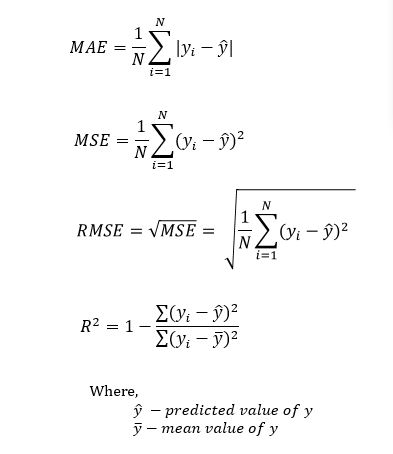

In [32]:
from IPython.display import display, Image
display(Image(filename = 'Measurement Accuracy.JPG'))

<Figure size 1440x360 with 0 Axes>

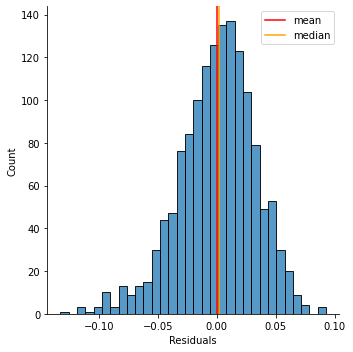

In [33]:
residuals = minute_group["temp"] - y_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.show()

In [34]:
# Define bounds: +- 3std (for alarm)

std = np.std(residuals)
y_predict_upBound = y_predict + 3*std
y_predict_lowBound = y_predict - 3*std

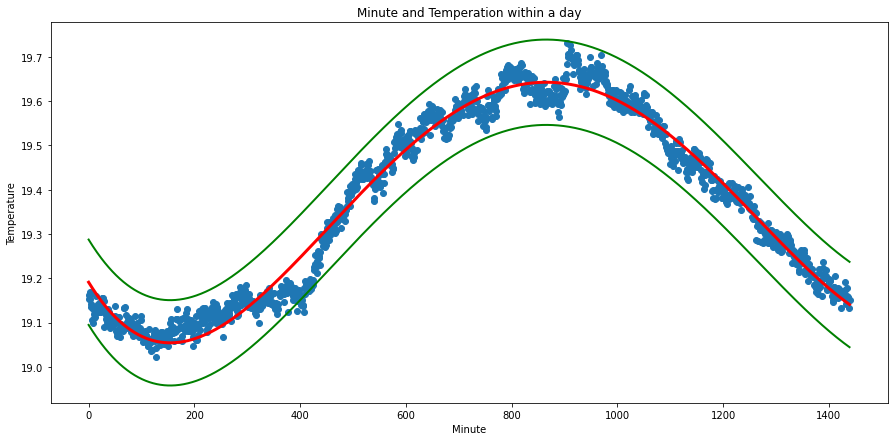

In [37]:
plt.figure(figsize=(15, 7))
plt.scatter(minute_group["minute"], minute_group["temp"])
plt.plot(minute_group["minute"], y_predict, color = "red", linewidth = 3)
plt.plot(minute_group["minute"], y_predict_upBound, color = "green", linewidth = 2)
plt.plot(minute_group["minute"], y_predict_lowBound, color = "green", linewidth = 2)
plt.title("Minute and Temperation within a day")
plt.xlabel("Minute")
plt.ylabel("Temperature")
plt.show()